Data Cleaning

Data cleaning includes processes such as filling in missing values and handling inconsistencies. It detects corrupt data and replaces or modifies it.

Missing Values

The concept of missing values is important to understand if you want to master the skill of successful management and understanding of data. Let's take a look at the following figure:

**Removing Missing Data**

***we will be loading the Banking_Marketing.csv dataset into the pandas DataFrame and handling the missing data. ***

In [ ]:
import pandas as pd

dataset = '/content/Banking_Marketing.csv'

#reading the data into the dataframe into the object data

df = pd.read_csv(dataset, header=0)

Once you have fetched the dataset, print the datatype of each column. To do so, use the dtypes attribute from the pandas DataFrame:

df.dtypes

In [ ]:
df.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

Now we need to find the missing values for each column. In order to do that, we use the isna() function provided by pandas:

df.isna().sum()

In [ ]:
df.isna().sum()

age               2
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          7
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

Once you have figured out all the missing details, we remove all the missing rows from the DataFrame. To do so, we use the dropna() function:

#removing Null values



In [ ]:
df = df.dropna()

To check whether the missing vales are still present, use the isna() function:


In [ ]:
df.isna().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

**second method of dealing with missing data, which uses imputation.**

Mean/Median/Mode Imputation

In the case of numerical data, we can compute its mean or median and use the result to replace missing values. In the case of the categorical (non-numerical) data, we can compute its mode to replace the missing value. This is known as imputation.

# ** Imputing Missing Data**




In [ ]:
import pandas as pd

dataset = '/content/Banking_Marketing.csv'

df = pd.read_csv(dataset, header=0)

Impute the numerical data of the age column with its mean. To do so, first find the mean of the age column using the mean() function of pandas, and then print it:


In [ ]:

mean_age = df.age.mean()

print(mean_age)

40.023812413525256


Once this is done, impute the missing data with its mean using the fillna() function. This can be done with the following code:



In [ ]:
df.age.fillna(mean_age, inplace=True)

Now we impute the numerical data of the duration column with its median. To do so, first find the median of the duration column using the median() function of the pandas. Add the following code to do so:



In [ ]:
median_duration = df.duration.median()

print(median_duration)

180.0


Impute the missing data of the duration with its median using the fillna() function.


In [ ]:

df.duration.fillna(median_duration,inplace=True)

Impute the categorical data of the contact column with its mode. To do so, first, find the mode of the contact column using the mode() function of pandas. Add the following code to do this:

In [ ]:
mode_contact = df.contact.mode()[0]

print(mode_contact)

cellular


Impute the missing data of the contact column with its mode using the fillna() function. Add the following code to do this:

In [ ]:
df.contact.fillna(mode_contact,inplace=True)

Outliers

Outliers are values that are very large or very small with respect to the distribution of the other data. We can only find outliers in numerical data. Box plots are one good way to find the outliers in a dataset, as you can see in the following figure: **bold text** **bold text**


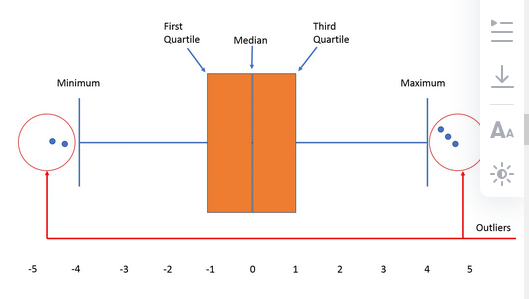

In [ ]:
Let's learn how to find outliers using a simple example. Consider a sample dataset of temperatures from a place at different times:

71, 70, 90, 70, 70, 60, 70, 72, 72, 320, 71, 69

We can now do the following:

    First, we'll sort the data:

    60,69, 70, 70, 70, 70, 71, 71, 72, 72, 90, 320
    Next, we'll calculate the median (Q2). The median is the middle data after sorting.

    Here, the middle terms are 70 and 71 after sorting the list.

    The median is (70 + 71) / 2 = 70.5
    Then we'll calculate the lower quartile (Q1). Q1 is the middle value (median) of the first half of the dataset.

    First half of the data = 60, 69, 70, 70, 70, 70

    Points 3 and 4 of the bottom 6 are both equal to 70.

    The average is (70 + 70) / 2 = 70

    Q1 = 70
    Then we calculate the upper quartile (Q3).

    Q3 is the middle value (median) of the second half of the dataset.
    second half of the dataset.

    Second half of the data = 71, 71, 72, 72, 90, 320

    Points 3 and 4 of the upper 6 are 72 and 72.

    The average is (72 + 72) / 2 = 72

    Q3 = 72
    Then we find the interquartile range (IQR).

    IQR = Q3 – Q1 = 72 – 70

    IQR = 2
    Next, we find the upper and lower fences.

    Lower fence = Q1 – 1.5 (IQR) = 70 – 1.5(2) = 67

    Upper fence = Q3 + 1.5 (IQR) = 71.5 + 1.5(2) = 74.5

    Boundaries of our fences = 67 and 74.5

Any data points lower than the lower fence and greater than the upper fence are outliers. Thus, the outliers from our example are 60, 90 and 320.

In [ ]:
import pandas as pd

import numpy as np

%matplotlib inline

import seaborn as sbn

dataset = '/content/german_credit_data.csv'

#reading the data into the dataframe into the object data

df = pd.read_csv(dataset, header=0)

This dataset contains an Age column. Let's plot a boxplot of the Age column. To do so, use the boxplot() function from the seaborn library:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


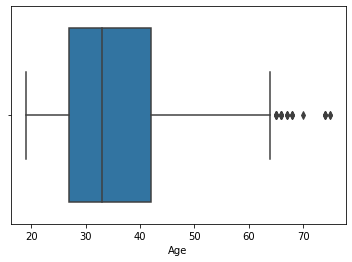

In [ ]:

sbn.boxplot(df['Age'])

In [ ]:
Q1 = df["Age"].quantile(0.25)

Q3 = df["Age"].quantile(0.75)

IQR = Q3 - Q1

print(IQR)

15.0


In [ ]:
Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

print(Lower_Fence)

print(Upper_Fence)

4.5
64.5


In [ ]:
df[((df["Age"] < Lower_Fence) |(df["Age"] > Upper_Fence))]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
75,75,66,male,3,free,little,little,1526,12,car
137,137,66,male,1,own,quite rich,moderate,766,12,radio/TV
163,163,70,male,3,free,little,moderate,7308,10,car
179,179,65,male,2,own,little,little,571,21,car
186,186,74,female,3,free,little,moderate,5129,9,car
187,187,68,male,0,free,little,moderate,1175,16,car
213,213,66,male,3,own,little,rich,1908,30,business
330,330,75,male,3,free,little,little,6615,24,car
430,430,74,male,1,own,little,NaN,3448,5,business


In [ ]:
df = df[~((df ["Age"] < Lower_Fence) |(df["Age"] > Upper_Fence))]

df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
